*자주 쓰는 컴파일 옵션 정리*
loss 매개변수
- 이진 크로스 엔트로피 'binary_crossentropy' : 이진분류에서 자주쓴다. 
- 범주형 크로스 엔트로피 'categorical_crossentropy' : 다중 클래쓰 분류 문제에서 자주쓴다. 
- 평균 제곱 오차 'mse' : 회귀문제에서 주로 사용한다. 값차이가 클수록 더 큰 패널티를 부여한다.
- 평균 절댓값 오차 'mae' : 회귀문제에서 주로 사용한다. 값 차이와 패널티가 정비례한다. 

*metrics 매개변수 (평가지표 저장할 리스트)*
- 정확도 'accuracy'
- 평균 제곱 오차 'mse'
- 평균 절댓값 오차 'mae'

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 자주 쓰는 컴파일 옵션 정리
# loss 매개변수
#     이진 크로스 엔트로피 'binary_crossentropy' : 이진분류에서 자주쓴다. 
#     범주형 크로스 엔트로피 'categorical_crossentropy' : 다중 클래쓰 분류 문제에서 자주쓴다. 
#     평균 제곱 오차 'mse' : 회귀문제에서 주로 사용한다. 값차이가 클수록 더 큰 패널티를 부여한다.
#     평균 절댓값 오차 'mae' : 회귀문제에서 주로 사용한다. 값 차이와 패널티가 정비례한다. 

# metrics 매개변수 (평가지표 저장할 리스트)
#     정확도 'accuracy'
#     평균 제곱 오차 'mse'
#     평균 절댓값 오차 'mae'

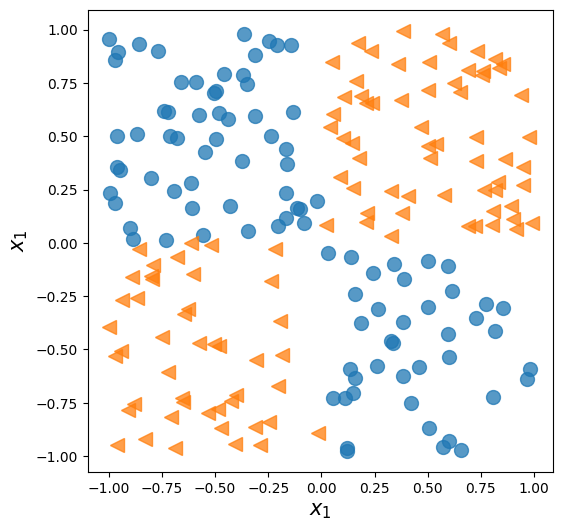

[[-0.16595599  0.44064899]
 [-0.99977125 -0.39533485]
 [-0.70648822 -0.81532281]
 [-0.62747958 -0.30887855]
 [-0.20646505  0.07763347]
 [-0.16161097  0.370439  ]
 [-0.5910955   0.75623487]
 [-0.94522481  0.34093502]
 [-0.1653904   0.11737966]
 [-0.71922612 -0.60379702]
 [ 0.60148914  0.93652315]
 [-0.37315164  0.38464523]
 [ 0.7527783   0.78921333]
 [-0.82991158 -0.92189043]
 [-0.66033916  0.75628501]
 [-0.80330633 -0.15778475]
 [ 0.91577906  0.06633057]
 [ 0.38375423 -0.36896874]
 [ 0.37300186  0.66925134]
 [-0.96342345  0.50028863]
 [ 0.97772218  0.49633131]
 [-0.43911202  0.57855866]
 [-0.79354799 -0.10421295]
 [ 0.81719101 -0.4127717 ]
 [-0.42444932 -0.73994286]
 [-0.96126608  0.35767107]
 [-0.57674377 -0.46890668]
 [-0.01685368 -0.89327491]
 [ 0.14823521 -0.70654285]
 [ 0.17861107  0.39951672]
 [-0.79533114 -0.17188802]
 [ 0.38880032 -0.17164146]
 [-0.90009308  0.07179281]
 [ 0.32758929  0.02977822]
 [ 0.88918951  0.17311008]
 [ 0.80680383 -0.72505059]
 [-0.72144731  0.61478258]
 

In [16]:
# XOR dataset 생성
tf.random.set_seed(1)
np.random.seed(1)
x = np.random.uniform(low=-1, high=1, size=(200,2)) # 레이블 종류 2개, 특성 종류 2개. 값의 범위는 -1 ~ 1의 숫자
y = np.ones(len(x))
y[x[:, 0] * x[:, 1] < 0] = 0
x_train = x[:100, :]
y_train = y[: 100]
x_valid = x[100:, :]
y_valid = y[100 :]
fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0],
         x[y==0, 1],
        'o',
        alpha=0.75,
        markersize=10)
plt.plot(x[y==1, 0],
         x[y==1, 1],
        '<',
        alpha=0.75,
        markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_1$', size=15)
plt.show()
print(x_train)
print(y_train)
print(x_valid)
print(y_valid)


기본적으로 많은 파라미털르 가지고 있으면, 모델이 복잡한 함수를 근사할수 있다.
단일층으로 시작해서 점점 넓이(한 층에서의 노드개수)나 깊이(층의 개수)를 늘려가면서 점진적으로 성능을 비교해 나가는것이 좋다.

In [17]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(
    units=1, input_shape=(2, ), activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])
hist = model.fit(x_train, y_train,
                 validation_data=(x_valid, y_valid),
                 epochs=200,
                 batch_size=2,
                 verbose=0)

In [19]:
for a in hist.history:
    print(a)

loss
binary_accuracy
val_loss
val_binary_accuracy


  163/20000 [..............................] - ETA: 6s   

/var/folders/6q/q927ypwn4ll9d4rvjq9gl1qw0000gn/T/ipykernel_45537/2461521625.py:20: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),


20000/20000 [==============================] - 5s 231us/step


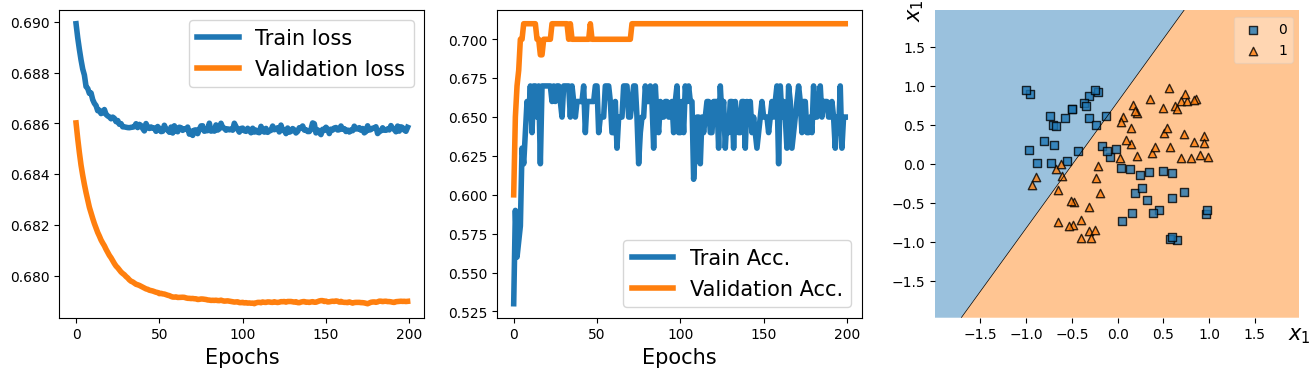

In [21]:
from mlxtend.plotting import plot_decision_regions

# 결정 영역과 훈련 성능을 그리는 함수 정의
def plot_region(hist, model):
    history = hist.history
    fig = plt.figure(figsize=(16, 4))
    ax = fig.add_subplot(1, 3, 1)
    plt.plot(history['loss'], lw=4)
    plt.plot(history['val_loss'], lw=4)
    plt.legend(['Train loss', 'Validation loss'], fontsize=15)
    ax.set_xlabel('Epochs', size=15)

    ax = fig.add_subplot(1, 3, 2)
    plt.plot(history['binary_accuracy'], lw=4)
    plt.plot(history['val_binary_accuracy'], lw=4)
    plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
    ax.set_xlabel('Epochs', size=15)

    ax = fig.add_subplot(1, 3, 3)
    plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                        clf=model)
    ax.set_xlabel(r'$x_1$', size=15)
    ax.xaxis.set_label_coords(1, -0.025)
    ax.set_ylabel(r'$x_1$', size=15)
    ax.yaxis.set_label_coords(-0.025, 1)
    plt.show()

plot_region(hist, model)

비선형적인 데이터셋에 대해서 은닉층없는 간단한 모델은 선형 결정경계만 찾을수 있다.
그럼으로 XOR데이터셋 분류에 대한 문제를 풀수 없다.

한개 이상의 비선형 활성화 함수를 사용해서 은닉층을 천천히 추가해보자.

In [22]:
tf.random.set_seed(1)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=4, input_shape=(2, ), activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 12        
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])
hist = model.fit(x_train, y_train,
                 validation_data=(x_valid, y_valid),
                 epochs=200,
                 batch_size=2,
                 verbose=0)

  127/20000 [..............................] - ETA: 7s   

/var/folders/6q/q927ypwn4ll9d4rvjq9gl1qw0000gn/T/ipykernel_45537/2461521625.py:20: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),


20000/20000 [==============================] - 5s 246us/step


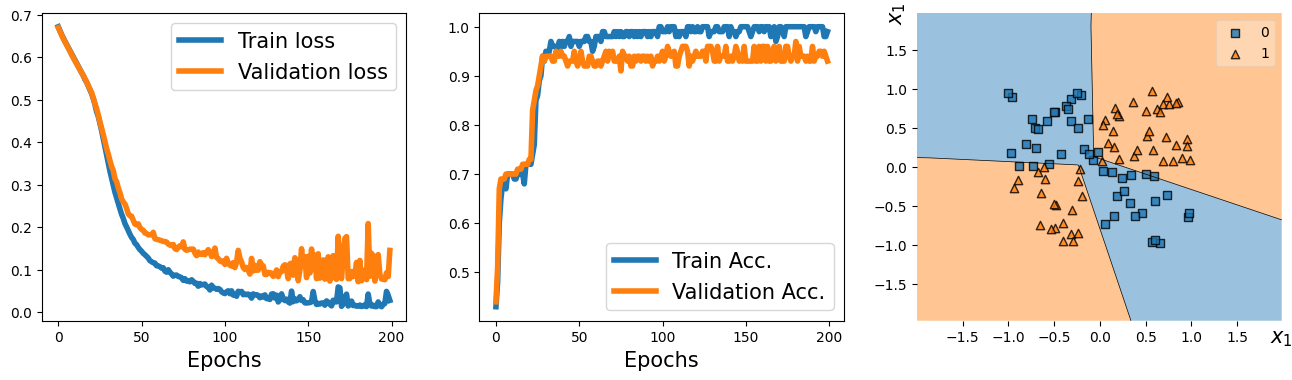

In [24]:
plot_region(hist, model)

In [30]:
val_loss, val_accuracy = model.evaluate(x_valid, y_valid, verbose=0)
print(f"Validation Loss: {val_loss}")           # Validation Loss은 예측값과 실제값의 차이다. 이 값이 작을수록 모델이 이 데이터셋을 잘 예측한다 의미한다.
print(f"Validation Accuracy: {val_accuracy}")   # Validation Accuracy 검증 확률이다. 

Validation Loss: 0.14526653289794922
Validation Accuracy: 0.9300000071525574


**다층의 비 선형 함수를 은닉층으로 하는 신경망은 비 선형 구조에 대한 적절한 결정경계를 파악할수 있다.** 

### 비선형 활성화 함수
1. **Sigmoid**
   - **정의**: \( f(x) = \frac{1}{1 + e^{-x}} \)
   - **목적**: 이진 분류 문제에서 주로 사용되며, 출력값을 (0, 1) 사이로 변환합니다. 이는 출력층에서 확률값을 나타낼 때 유용합니다.
   - **장점**: 출력값이 (0, 1) 사이에 위치하여 해석이 용이합니다.
   - **단점**: Gradient vanishing 문제로 인해 깊은 네트워크에서의 학습이 어렵습니다.
   
2. **Tanh (Hyperbolic Tangent)**
   - **정의**: \( f(x) = \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} \)
   - **목적**: Sigmoid와 비슷하지만, 출력값이 (-1, 1) 사이로 변환됩니다. 이는 평균이 0에 가까워지도록 하여, 학습의 수렴 속도를 높입니다.
   - **장점**: Sigmoid보다 출력값이 넓어지고, Gradient vanishing 문제가 덜 발생합니다.
   - **단점**: 여전히 Gradient vanishing 문제는 존재합니다.
   
3. **ReLU (Rectified Linear Unit)**
   - **정의**: \( f(x) = \max(0, x) \)
   - **목적**: 대부분의 딥러닝 모델에서 기본 활성화 함수로 사용됩니다. 양의 입력에 대해 선형성을 유지하면서 음의 입력에 대해 0으로 비활성화합니다.
   - **장점**: Gradient vanishing 문제가 거의 발생하지 않으며, 계산이 간단합니다.
   - **단점**: 음의 입력값에 대해 0으로 고정되기 때문에, 모든 입력이 음수일 경우 학습이 정지될 수 있습니다(Dead ReLU 문제).
   
4. **Leaky ReLU**
   - **정의**: \( f(x) = \max(0.01x, x) \)
   - **목적**: ReLU의 변형으로, 음의 입력값에 대해 작은 기울기를 유지하여 Dead ReLU 문제를 완화합니다.
   - **장점**: Dead ReLU 문제를 완화하며, ReLU의 장점을 대부분 유지합니다.
   
5. **Softmax**
   - **정의**: \( f(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}} \)
   - **목적**: 다중 클래스 분류 문제에서 주로 사용되며, 각 클래스에 대한 확률값을 출력합니다.
   - **장점**: 확률값으로 출력이 해석되며, 클래스 간의 관계를 고려합니다.
   - **단점**: 주로 출력층에서 사용되며, Hidden Layer에서는 사용되지 않습니다.

### 선형 활성화 함수
1. **Identity (선형)**
   - **정의**: \( f(x) = x \)
   - **목적**: 주로 회귀 문제의 출력층에서 사용됩니다.
   - **장점**: 입력값을 그대로 출력하므로, 회귀 문제에 적합합니다.
   - **단점**: Hidden Layer에서 사용될 경우, 네트워크가 비선형성을 학습할 수 없습니다.

### 정리
- **선형 활성화 함수**는 회귀 문제나 출력층에서 주로 사용되며, 네트워크의 비선형성을 제공하지 않습니다.
- **비선형 활성화 함수**는 딥러닝의 핵심으로, 모델이 복잡한 패턴을 학습하고 비선형적인 관계를 학습할 수 있게 합니다. 각 활성화 함수는 특정 문제나 모델 구조에 따라 장단점이 있어, 적절히 선택하여 사용하는 것이 중요합니다.

Sequential클래쓰로는 간편하고 일반적이나, 여러 개의 입력, 출력을 가진 중간가지(branch)가 있는 복잡한 모듈을 만들 수가 없다.
함수형 캐라스가 이를 해결해준다.

In [31]:
tf.random.set_seed(1)
## 입력층
inputs = tf.keras.Input(shape=(2, ))
## 은닉층
h1 = tf.keras.layers.Dense(units=4, activation='relu')(inputs)  # 출력 : h1 , h2의 입력이 된다.
h2 = tf.keras.layers.Dense(units=4, activation='relu')(h1)      # 출력 : h2 , h3의 입력이 된다.
h3 = tf.keras.layers.Dense(units=4, activation='relu')(h2)      
outputs = tf.keras.layers.Dense(units=1, activation='sigmoid')(h3)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_7 (Dense)             (None, 4)                 12        
                                                                 
 dense_8 (Dense)             (None, 4)                 20        
                                                                 
 dense_9 (Dense)             (None, 4)                 20        
                                                                 
 dense_10 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

hist = model.fit(
    x_train, y_train,
    validation_data=(x_valid, y_valid),
    epochs=200, 
    batch_size=2, 
    verbose=0)

Model 클래쓰 상속을 통해서 복잡한 모델을 만들기

In [73]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__(self)
        self.hidden_1 = tf.keras.layers.Dense(units=4, activation='relu')  # 출력 : h1 , h2의 입력이 된다.
        self.hidden_2 = tf.keras.layers.Dense(units=4, activation='relu')      # 출력 : h2 , h3의 입력이 된다.
        self.hidden_3 = tf.keras.layers.Dense(units=4, activation='relu')      
        self.output_layer = tf.keras.layers.Dense(units=1, activation='sigmoid')

    def call(self, inputs):
        # 복잡한 은닉층 동작하게 하기. input -> hidden_1 -> hidden_2 -> hidden_3 -> output_layer
        h = self.hidden_1(inputs)
        h = self.hidden_2(h)
        h = self.hidden_3(h)
        return self.output_layer(h)
                

In [74]:
tf.random.set_seed(1)
## 입력층
model = MyModel()
model.build(input_shape=(None, 2))
model.summary()

model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

hist = model.fit(
    x_train, y_train,
    validation_data=(x_valid, y_valid),
    epochs=200, 
    batch_size=2, 
    verbose=0)

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            multiple                  12        
                                                                 
 dense_19 (Dense)            multiple                  20        
                                                                 
 dense_20 (Dense)            multiple                  20        
                                                                 
 dense_21 (Dense)            multiple                  5         
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


두가지 방법으로 복잡한 은닉층 모델을 만들었다.
1. 함수형 케라스
2. 사용자 정의 클래스에 model을 상속시키기

앞으론 사용자 정의 캐라스층을 만들어 볼것이다.

In [75]:
class NoisyLinear(tf.keras.layers.Layer):
    def __init__(self, outputs_dim, noise_stddev=0.1, **kwargs):
        self.output_dim = outputs_dim
        self.noise_stddev = noise_stddev
        super(NoisyLinear, self).__init__(**kwargs)

    def build(self, input_shape):
        self.w = self.add_weight(name='weights',
                                 shape=(input_shape[1], self.output_dim),   # 이전층에서의 입력의 특성개수
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(shape=(self.output_dim, ),                   # 이 노이즈층의 노드개수에 맞춰서 가중치크기도 설정된다.
                                 initializer='random_normal',
                                 trainable=True)
    
    def call(self, inputs, training=False):
        if training:
            batch = tf.shape(inputs)[0] # 들어오는 데이터셋의 샘플 개수만큼 배치크기 설정
            dim = tf.shape(inputs)[1]   # 샘플의 특성의 개수 - 차원수
            noise = tf.random.normal(shape=(batch, dim), # 샘플개수, 특성수가 같은 노이즈 생성
                                     mean=0.0,
                                     stddev=self.noise_stddev)
            noisy_inputs = tf.add(inputs, noise)    # 만들어 놓은 노이즈와, input 텐서끼리의 원소합 진행.
        else:
            noisy_inputs = inputs       # training 변수가 False이면 노이즈를 추가하지 않는다.
        z = tf.matmul(noisy_inputs, self.w) + self.b
        return tf.keras.activations.relu(z)
    
    def get_config(self):
        config = super(NoisyLinear, self).get_config()
        config.update({'outputs_dim' : self.output_dim,
                       'noise_stddev': self.noise_stddev})
        return config


In [76]:
tf.random.set_seed(1)
noisy_layer = NoisyLinear(4)
noisy_layer.build(input_shape=(None, 4))

x = tf.zeros(shape=(1, 4))
tf.print(noisy_layer(x, training=True))

config = noisy_layer.get_config() 
new_layer = NoisyLinear.from_config(config)
tf.print(new_layer(x, training=True))


[[0 0 0 0.0495110378]]
[[0.0447039753 0 0.00279114628 0.0108304014]]


In [77]:
tf.random.set_seed(1)
model = tf.keras.Sequential([
    NoisyLinear(4, noise_stddev=0.1),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')])
model.build(input_shape=(None, 2))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 noisy_linear_11 (NoisyLine  (None, 4)                 12        
 ar)                                                             
                                                                 
 dense_22 (Dense)            (None, 4)                 20        
                                                                 
 dense_23 (Dense)            (None, 4)                 20        
                                                                 
 dense_24 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

hist = model.fit(
    x_train, y_train,
    validation_data=(x_valid, y_valid),
    epochs=200, 
    batch_size=2, 
    verbose=0)

  320/20000 [..............................] - ETA: 6s 

/var/folders/6q/q927ypwn4ll9d4rvjq9gl1qw0000gn/T/ipykernel_45537/2461521625.py:20: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),


20000/20000 [==============================] - 6s 274us/step


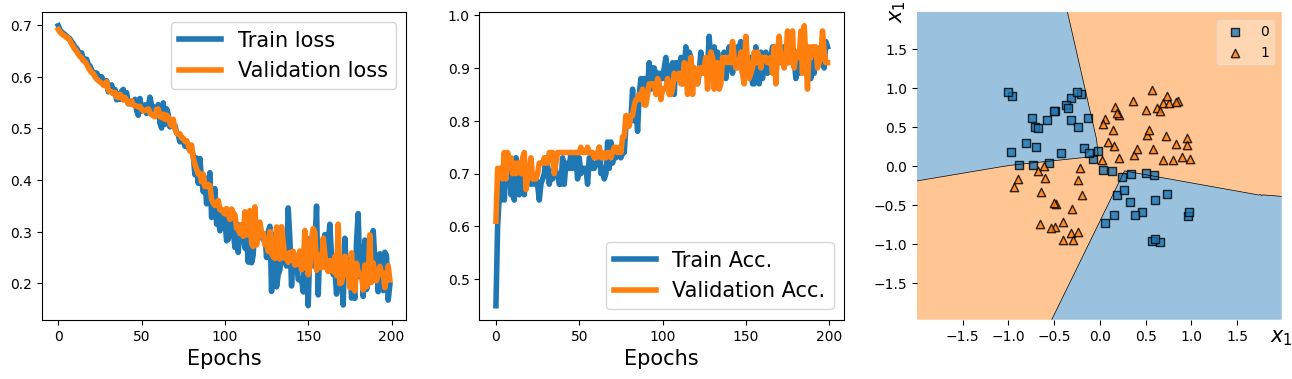

In [79]:
plot_region(hist=hist, model=model)

In [91]:
# 훈련된 원본 모듈의 정확도 확인
new_input = np.array([[-0.5, -0.5]])

# 예측 수행
y_pred = model.predict(new_input)
print('예측 결과:', y_pred)


1/1 [==============================] - 0s 73ms/step
예측 결과: [[0.9784776]]
